In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [6]:
# Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Loop through the cities list.
# Group the cities in sets of 50 to log the process as we find the weather data for each city.
# Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# Build the city_url or endpoint for each city.
# Log the URL and the record and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following:
# City, country, and date
# Latitude and longitude
# Maximum temperature
# Humidity
# Cloudiness
# Wind speed
# Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f6c954fe44c6839fed8d7b04627a9ec


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Processing Record 1 of Set 13 | kavaratti
Processing Record 2 of Set 13 | killarney
Processing Record 3 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 13 | bilibino
Processing Record 5 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 13 | albany
Processing Record 7 of Set 13 | souillac
Processing Record 8 of Set 13 | hobart
Processing Record 9 of Set 13 | busselton
Processing Record 10 of Set 13 | oyotun
Processing Record 11 of Set 13 | sitka
Processing Record 12 of Set 13 | port elizabeth
Processing Record 13 of Set 13 | marzuq
Processing Record 14 of Set 13 | hermanus
Processing Record 15 of Set 13 | barrow
Processing Record 16 of Set 13 | victoria
Processing Record 17 of Set 13 | carballo
Processing Record 18 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 13 | atuona
Processing Record 20 of Set 13 | yellowknife
Processing Record 21 of Set 13 | provideniya
Processing Record 22 of Set 13 

Processing Record 36 of Set 16 | mayo
Processing Record 37 of Set 16 | margate
Processing Record 38 of Set 16 | san cristobal
Processing Record 39 of Set 16 | qaqortoq
Processing Record 40 of Set 16 | east london
Processing Record 41 of Set 16 | saint-augustin
Processing Record 42 of Set 16 | oistins
Processing Record 43 of Set 16 | galgani
City not found. Skipping...
Processing Record 44 of Set 16 | batemans bay
Processing Record 45 of Set 16 | namikupa
Processing Record 46 of Set 16 | narsaq
Processing Record 47 of Set 16 | tommot
Processing Record 48 of Set 16 | saskylakh
Processing Record 49 of Set 16 | walvis bay
Processing Record 50 of Set 16 | balkanabat
Processing Record 1 of Set 17 | new norfolk
Processing Record 2 of Set 17 | emmett
Processing Record 3 of Set 17 | bronnoysund
Processing Record 4 of Set 17 | namibe
Processing Record 5 of Set 17 | korla
Processing Record 6 of Set 17 | humboldt
Processing Record 7 of Set 17 | haademeeste
City not found. Skipping...
Processing Re

Processing Record 25 of Set 20 | saint-louis
Processing Record 26 of Set 20 | maxixe
Processing Record 27 of Set 20 | aflu
City not found. Skipping...
Processing Record 28 of Set 20 | moose factory
Processing Record 29 of Set 20 | haines junction
Processing Record 30 of Set 20 | bokoro
Processing Record 31 of Set 20 | kahuta
Processing Record 32 of Set 20 | samusu
City not found. Skipping...
Processing Record 33 of Set 20 | esperance
Processing Record 34 of Set 20 | henties bay
Processing Record 35 of Set 20 | los llanos de aridane
Processing Record 36 of Set 20 | george town
Processing Record 37 of Set 20 | sidi bu zayd
City not found. Skipping...
Processing Record 38 of Set 20 | huangmei
Processing Record 39 of Set 20 | oranjemund
Processing Record 40 of Set 20 | lorengau
Processing Record 41 of Set 20 | kysyl-syr
Processing Record 42 of Set 20 | staunton
Processing Record 43 of Set 20 | barbar
City not found. Skipping...
Processing Record 44 of Set 20 | coruripe
Processing Record 45

Processing Record 8 of Set 24 | grindavik
Processing Record 9 of Set 24 | padang
Processing Record 10 of Set 24 | jiroft
City not found. Skipping...
Processing Record 11 of Set 24 | mackay
Processing Record 12 of Set 24 | kristinehamn
Processing Record 13 of Set 24 | bandarbeyla
Processing Record 14 of Set 24 | kollumerland
City not found. Skipping...
Processing Record 15 of Set 24 | gore
Processing Record 16 of Set 24 | cap malheureux
Processing Record 17 of Set 24 | damghan
Processing Record 18 of Set 24 | xiashi
Processing Record 19 of Set 24 | rio gallegos
Processing Record 20 of Set 24 | agulu
Processing Record 21 of Set 24 | port augusta
Processing Record 22 of Set 24 | bardejov
Processing Record 23 of Set 24 | camana
Processing Record 24 of Set 24 | linjiang
Processing Record 25 of Set 24 | pringsewu
Processing Record 26 of Set 24 | ghanzi
Processing Record 27 of Set 24 | koutsouras
Processing Record 28 of Set 24 | a
City not found. Skipping...
Processing Record 29 of Set 24 | y

In [13]:
len(city_data)

551

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavaratti,10.57,72.64,84.13,74,100,19.86,IN,2020-06-27 16:13:26
1,Killarney,52.05,-9.52,57.20,93,75,18.34,IE,2020-06-27 16:13:26
2,Bilibino,68.05,166.44,28.63,90,7,4.16,RU,2020-06-27 16:13:26
3,Albany,42.60,-73.97,69.01,77,100,4.61,US,2020-06-27 16:13:26
4,Souillac,-20.52,57.52,73.40,78,75,11.41,MU,2020-06-27 16:13:27
5,Hobart,-42.88,147.33,39.99,93,44,4.70,AU,2020-06-27 16:08:31
6,Busselton,-33.65,115.33,60.01,86,60,21.30,AU,2020-06-27 16:13:27
7,Oyotun,-6.85,-79.30,66.20,77,75,9.17,PE,2020-06-27 16:13:27
8,Sitka,57.05,-135.33,53.60,87,90,4.70,US,2020-06-27 16:13:27
9,Port Elizabeth,-33.92,25.57,71.60,39,7,17.22,ZA,2020-06-27 16:13:27


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kavaratti,IN,2020-06-27 16:13:26,10.57,72.64,84.13,74,100,19.86
1,Killarney,IE,2020-06-27 16:13:26,52.05,-9.52,57.20,93,75,18.34
2,Bilibino,RU,2020-06-27 16:13:26,68.05,166.44,28.63,90,7,4.16
3,Albany,US,2020-06-27 16:13:26,42.60,-73.97,69.01,77,100,4.61
4,Souillac,MU,2020-06-27 16:13:27,-20.52,57.52,73.40,78,75,11.41
...,...,...,...,...,...,...,...,...,...
546,Surgut,RU,2020-06-27 16:14:55,61.25,73.42,57.20,76,100,4.47
547,Chokwe,MZ,2020-06-27 16:14:55,-24.53,32.98,69.76,38,0,5.48
548,Atherton,GB,2020-06-27 16:14:56,53.52,-2.49,64.99,74,91,8.01
549,Ust-Kuyga,RU,2020-06-27 16:14:56,70.02,135.60,68.63,57,18,3.89


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1593274496.6683881

In [19]:
today = time.strftime("%x")
today

'06/27/20'

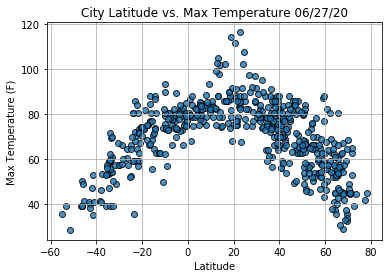

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

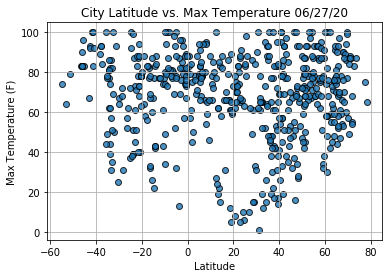

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

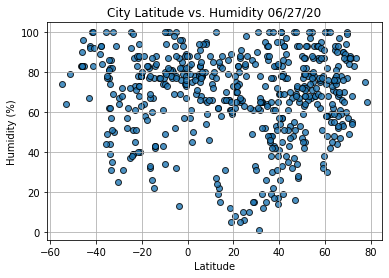

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

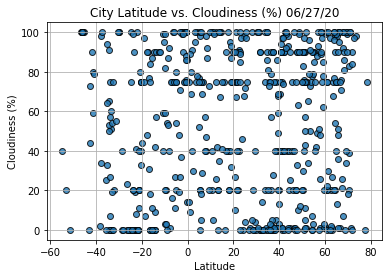

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

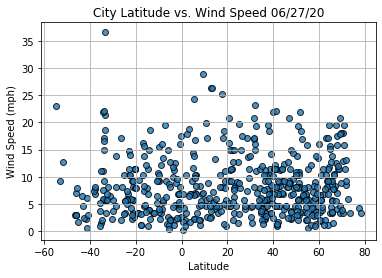

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City                     Victoria
Country                        HK
Date          2020-06-27 16:11:50
Lat                         22.29
Lng                        114.16
Max Temp                    82.99
Humidity                       80
Cloudiness                     91
Wind Speed                   1.99
Name: 13, dtype: object

In [27]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
546     True
547    False
548     True
549     True
550     True
Name: Lat, Length: 551, dtype: bool

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kavaratti,IN,2020-06-27 16:13:26,10.57,72.64,84.13,74,100,19.86
1,Killarney,IE,2020-06-27 16:13:26,52.05,-9.52,57.20,93,75,18.34
2,Bilibino,RU,2020-06-27 16:13:26,68.05,166.44,28.63,90,7,4.16
3,Albany,US,2020-06-27 16:13:26,42.60,-73.97,69.01,77,100,4.61
8,Sitka,US,2020-06-27 16:13:27,57.05,-135.33,53.60,87,90,4.70
...,...,...,...,...,...,...,...,...,...
545,Hermon,US,2020-06-27 16:14:55,44.81,-68.91,82.00,47,90,9.17
546,Surgut,RU,2020-06-27 16:14:55,61.25,73.42,57.20,76,100,4.47
548,Atherton,GB,2020-06-27 16:14:56,53.52,-2.49,64.99,74,91,8.01
549,Ust-Kuyga,RU,2020-06-27 16:14:56,70.02,135.60,68.63,57,18,3.89


In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kavaratti,IN,2020-06-27 16:13:26,10.57,72.64,84.13,74,100,19.86
1,Killarney,IE,2020-06-27 16:13:26,52.05,-9.52,57.20,93,75,18.34
2,Bilibino,RU,2020-06-27 16:13:26,68.05,166.44,28.63,90,7,4.16
3,Albany,US,2020-06-27 16:13:26,42.60,-73.97,69.01,77,100,4.61
8,Sitka,US,2020-06-27 16:13:27,57.05,-135.33,53.60,87,90,4.70


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

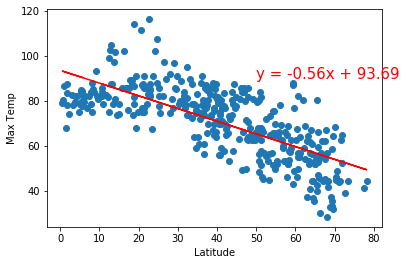

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(50, 90))                                                                   

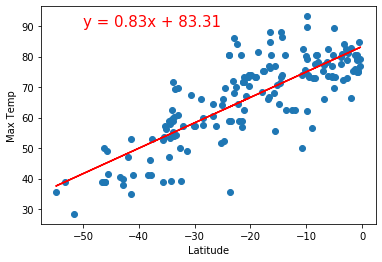

In [32]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

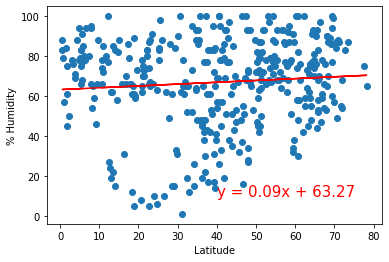

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

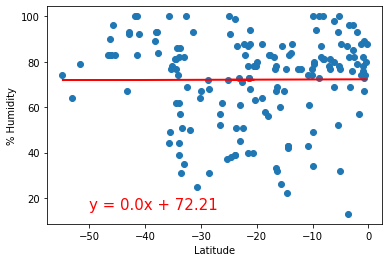

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

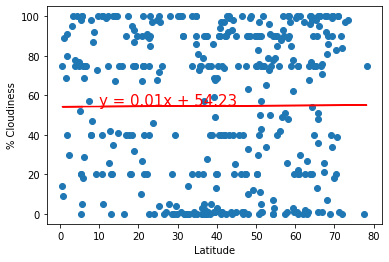

In [35]:
## 6.4.4 Refactor the code we have been using for linear regression lines and plots to create the x- and y-values for the percent cloudiness and latitudes on the Northern Hemisphere DataFrame.
## Call the plot_linear_regression function with the correct arguments to create the linear regression line and plot for percent cloudiness in the Northern Hemisphere. It should look like the following plot.  

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,55))

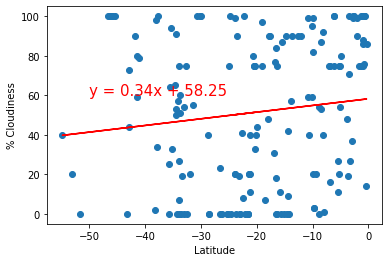

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

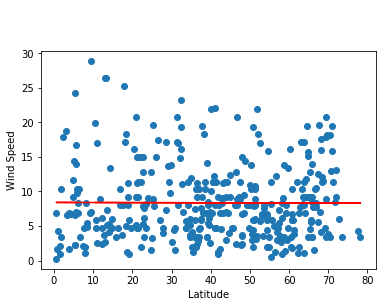

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

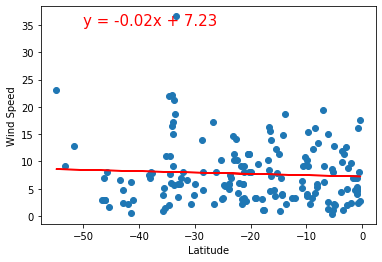

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))
